In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
fs=pd.read_csv("/content/drive/My Drive/Find-S.csv")

In [ ]:
r=len(fs)
c=len(fs.columns)-1
print(r,c)

4 6


# **Find - S    4/4/2023**

In [ ]:
# 1.	Implement and demonstrate the FIND-S algorithm to finding the most specific hypothesis
#  based on a given set of data samples. Read the training data from a .CSV file.


h=[None]*c
print('h0 :',h)
for i in range(r):
  if fs.loc[i]['EnjoySport']=='Yes':
    for j in range(c):
      if h[j]==None:
        h[j]=fs.loc[i][j]
      elif h[j]!=fs.loc[i][j]:
        h[j]='?'

  print('h'+str(i+1),':',h)


h0 : [None, None, None, None, None, None]
h1 : ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
h2 : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
h3 : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
h4 : ['Sunny', 'Warm', '?', 'Strong', '?', '?']


# **Candidate Elimination   4/4/2023**

In [ ]:
# 2.	For a given set of training data examples stored in a .CSV file, 
#implement and demonstrate the Candidate-Elimination
# algorithm to output a description of the set of all hypotheses consistent with the training examples.

s=[None]*c
g_=['?']*c
g=[g_]
print('s0 :',s)
print('g0 :',g)

def removeFrom(g,d):
  i=0
  while i<len(g):
    k=g[i]
    f=0
    for j in range(c):
      if k[j]!='?':
        if k[j]!=d[j]:
          g.remove(k)
          f=1
          break
    if f==0: i+=1


def generalize(s,d):
  for j in range(c):
      if s[j]==None:
        s[j]=d[j]
      elif s[j]!=d[j]:
        s[j]='?'



def inconsistent(k,d):
  for j in range(c):
    if k[j]!='?':
      if k[j]!=d[j]:
        return 0
  return 1


def specialize(g,d):
  i=0
  m=[]
  while i<len(g):
    k=g[i]
    f=0
    if inconsistent(k,d):
      for j in range(c):
        p=k.copy()
        if p[j]=='?' and s[j]!='?' and  s[j]!=d[j]:
          p[j]=s[j]
          m.append(p)
      f=1
      g.remove(k)
    if f==0: i+=1
  g.extend(m)
  g=np.unique(g,axis=0)


for i in range(r):
  if fs.loc[i]['EnjoySport']=='Yes':
    removeFrom(g,fs.loc[i])
    generalize(s,fs.loc[i])
  else:
    specialize(g,fs.loc[i])

  print('s'+str(i+1),':',s)
  print('g'+str(i+1),':',g)

print('Learned Version Space Combinations:')

v=[]
for k in g:
  f=0
  p=[]
  for j in range(c):
    if k[j]!='?' and k[j]==s[j]:
      p.append(j)
    elif k[j]!='?' and k[j]!=s[j]:
      f=1
      break

  if f==0:
    for j in range(c):
      q=k.copy()
      if j not in p and s[j]!='?':
        q[j]=s[j]
        v.append(q)

v=np.unique(v,axis=0)
print(v)


s0 : [None, None, None, None, None, None]
g0 : [['?', '?', '?', '?', '?', '?']]
s1 : ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
g1 : [['?', '?', '?', '?', '?', '?']]
s2 : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
g2 : [['?', '?', '?', '?', '?', '?']]
s3 : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
g3 : [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]
s4 : ['Sunny', 'Warm', '?', 'Strong', '?', '?']
g4 : [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]
Learned Version Space Combinations:
[['?' 'Warm' '?' 'Strong' '?' '?']
 ['Sunny' '?' '?' 'Strong' '?' '?']
 ['Sunny' 'Warm' '?' '?' '?' '?']]


# naive bayes 11/04/2023

In [ ]:
# 3.	Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file.
# Compute the accuracy of the classifier, considering few test data sets.

import numpy as np
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [ ]:
t=pd.read_csv('/content/drive/My Drive/Play_Tennis.csv')


In [ ]:
t

,Outlook,Temperature,Humidity,Windy,Class
0,sunny,hot,high,False,N
1,sunny,hot,high,True,N
2,overcast,hot,high,False,P
3,rain,mild,high,False,P
4,rain,cool,normal,False,P
5,rain,cool,normal,True,N
6,overcast,cool,normal,True,P
7,sunny,mild,high,False,N
8,sunny,cold,normal,False,P
9,rain,mild,normal,False,P


In [ ]:
from sklearn.model_selection import train_test_split
x=t.drop('Class',axis=1)
y=t.Class
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=15)

In [ ]:
c=len(x_train)
print('No. of rows in x_train =',c)
q=len(x_test)
print('No. of rows in x_test =',q)
k=len(x_train.columns)

No. of rows in x_train = 8
No. of rows in x_test = 6


In [ ]:
x_train.index=range(c)
x_test.index=range(q)
y_train.index=range(c)
y_test.index=range(q)
print('Train data')
print(x_train)
print('\nTest data')
print(x_test)

Train data
    Outlook Temperature Humidity  Windy
0  overcast        mild     high   True
1      rain        mild     high  False
2     sunny        mild   normal   True
3     sunny         hot     high  False
4     sunny        mild     high  False
5  overcast         hot   normal  False
6      rain        cool   normal   True
7     sunny        cold   normal  False

Test data
    Outlook Temperature Humidity  Windy
0      rain        mild     high   True
1  overcast         hot     high  False
2      rain        mild   normal  False
3      rain        cool   normal  False
4     sunny         hot     high   True
5  overcast        cool   normal   True


In [ ]:
c_n=len(y_train[y_train=='N'])
p_n=c_n/c
print('Probability of Negative class = ',p_n)
c_p=len(y_train[y_train=='P'])
p_p=c_p/c
print('Probability of Positive class = ',p_p)

Probability of Negative class =  0.375
Probability of Positive class =  0.625


In [ ]:
d_p={}
d_n={}
x_train['Class']=y_train
col=x_train.columns
for i in range(k):
  l=x_train[col[i]].unique()
  for j in l:
    d_p[j]=len(x_train[(x_train[col[i]]==j) & (x_train.Class=='P')])/c_p
    d_n[j]=len(x_train[(x_train[col[i]]==j) & (x_train.Class=='N')])/c_n


In [ ]:
# c_n=len(y_test[y_test=='N'])
# p_n=c_n/q
# print('Probability of Negative class for test data = %.3f'%(p_n))
# c_p=len(y_test[y_test=='P'])
# p_p=c_p/q
# print('Probability of Positive class for test data = %.3f'%(p_p))

Probability of Negative class for test data =  0.3333333333333333
Probability of Positive class for test data =  0.6666666666666666


In [ ]:
res=[]
p,n=1,1
for i in range(q):
  f=x_test.loc[i]
  for j in range(k):
    p=p*d_p[f[j]]
    n=n*d_n[f[j]]
  p=p*p_p
  n=n*p_n
  if p>=n:
    res.append('P')
  else:
    res.append('N')

In [ ]:
print('Predicted class labels =',res)
print('Actual class labels =\n',y_test)

Predicted class labels = ['P', 'P', 'P', 'P', 'P', 'P']
Actual class labels =
 0    N
1    P
2    P
3    P
4    N
5    P
Name: Class, dtype: object


In [ ]:
acc=0
for i in range(q):
  if res[i]==y_test[i]:
    acc=acc+1

print('Accuracy = %.3f'%(acc/q))

Accuracy = 0.667


# Naive Bayes 18/04/2023

In [ ]:
# 4.	Assuming a set of documents that need to be classified, use the naïve Bayesian classifier model to perform this task. Built-in Java classes /API can be used to write the program.
# Calculate the accuracy precision and recall for your data set.

import numpy as np
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/naivetext.csv')

In [ ]:
data['Text']=data['Text'].str.lower()

In [ ]:
from sklearn.model_selection import train_test_split
x=data
y=data.Class
t,test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=15)

In [ ]:
r=len(t)
c=len(t.columns)
print('No. of rows in train set :',r)

r1=len(test)
test.index=range(r1)
print('No. of rows in test set:',r1)

t.index,test.index,y_train.index,y_test.index=range(r),range(r1),range(r),range(r1)

No. of rows in train set : 10
No. of rows in test set: 8


In [ ]:
vocab=[]
for i in range(r):
  vocab.extend(t['Text'][i].split())

vocab=list(set(vocab))
l=len(vocab)
print('Vocabulary:',vocab)

Vocabulary: ['like', 'with', 'is', 'sworn', 'tomorrow', 'dance', 'i', 'the', 'good', 'great', 'am', 'locality', 'deal', 'tired', 'stuff', 'not', 'this', 'to', 'will', 'have', "can't", 'sandwich', 'restaurant', 'stay', 'juice', 'of', 'holiday', 'do', 'enemy', 'my', 'a', 'bad', 'fun', 'he', 'we', 'that', 'what', 'love', 'taste']


In [ ]:
c_p=len(t[t.Class=='pos'])
c_n=len(t[t.Class=='neg'])
p_p,p_n=c_p/r,c_n/r
print('Probability of positive texts = %.3f'%(p_p))
print('Probability of negative texts = %.3f'%(p_n))

Probability of positive texts = 0.400
Probability of negative texts = 0.600


In [ ]:
d_p,d_n={},{}
for i in range(r):
  if t['Class'][i]=='pos':
    for j in t['Text'][i].split():
      d_p[j]=d_p.get(j,0)+1
  else:
    for j in t['Text'][i].split():
      d_n[j]=d_n.get(j,0)+1

n1=sum(d_p.values())
n2=sum(d_n.values())
for i in vocab:
  d_p[i]=(d_p.get(i,0)+1)/(n1+l)
  d_n[i]=(d_n.get(i,0)+1)/(n2+l)


res=[]
for i in range(r1):
  p,n=1,1
  for j in test['Text'][i].split():
    if j in vocab:
      p=p*d_p[j]
      n=n*d_n[j]

  p=p*p_p
  n=n*p_n
  if p>n:
    res.append('pos')
  else:
    res.append('neg')

In [ ]:
print('Predicted class labels =',res)
print('Actual class labels =',list(test['Class']))

Predicted class labels = ['pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg']
Actual class labels = ['pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos']


In [ ]:
tn,fn,tp,fp=0,0,0,0
for i in range(r1):
  if res[i]=='neg' and test['Class'][i]=='neg':
    tn=tn+1
  elif res[i]=='neg' and test['Class'][i]=='pos':
    fn=fn+1
  elif res[i]=='pos' and test['Class'][i]=='neg':
    fp=fp+1
  elif res[i]=='pos' and test['Class'][i]=='pos':
    tp=tp+1

cfm=[[tn,fp],[fn,tp]]
print('Confusion Matrix:',cfm)
acc=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)

print('Accuracy = %.3f'%(acc))
print('Precision = %.3f'%(precision))
print('Recall = %.3f'%(recall))


Confusion Matrix: [[3, 0], [3, 2]]
Accuracy = 0.625
Precision = 1.000
Recall = 0.400


# Bayesian Network 25/04/2023

In [ ]:
# 5. Write a program to construct a Bayesian network considering medical data. Use this modelto demonstrate the diagnosis of
# heart patients using standard Heart Disease Data Set. You can use Java/Python ML library classes/API


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
#read Cleveland Heart Disease data
heartDisease = pd.read_csv('/content/drive/My Drive/heart.csv')
heartDisease = heartDisease.replace('?',np.nan)
#display the data
print('Sample instances from the dataset are given below')
print(heartDisease.head())

# display the Attributes names and datatyes
# print('\n Attributes and datatypes')
# print(heartDisease.dtypes)

#Creat Model- Bayesian Network
model = BayesianNetwork([('age','heartdisease'),('sex','heartdisease'),(
'exang','heartdisease'),('cp','heartdisease'),('heartdisease',
'restecg'),('heartdisease','chol')])
#Learning CPDs using Maximum Likelihood Estimators
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)
# Inferencing with Bayesian Network
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)
#computing the Probability of HeartDisease given restecg
print('\n 1.Probability of HeartDisease given evidence=restecg :1')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)
#computing the Probability of HeartDisease given cp
print('\n 2.Probability of HeartDisease given evidence= cp:2 ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)

Sample instances from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  heartdisease  
0   0     1             1  
1   0     2             1  
2   0     2             1  
3   0     2             1  
4   0     2             1  

 Learning CPD using Maximum likelihood estimators

 Inferencing with Bayesian Network:

 1.Probability of HeartDisease given evidence=restecg :1
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |    

# Decision Tree




In [ ]:
# 13/06/2023
# 6.	Write a program to demonstrate the working of the decision tree based ID3 algorithm.
# Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.


from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#ID3 Algorithm
import math
import csv
def load_csv(filename):
    lines=csv.reader(open(filename,"r"));
    dataset = list(lines)
    headers = dataset.pop(0)
    return dataset,headers

class Node:
    def __init__(self,attribute):
        self.attribute=attribute
        self.children=[]
        self.answer=""

def subtables(data,col,delete):
    dic={}
    coldata=[row[col] for row in data]
    attr=list(set(coldata))

    counts=[0]*len(attr)
    r=len(data)
    c=len(data[0])
    for x in range(len(attr)):
        for y in range(r):
            if data[y][col]==attr[x]:
                counts[x]+=1

    for x in range(len(attr)):
        dic[attr[x]]=[[0 for i in range(c)] for j in range(counts[x])]
        pos=0
        for y in range(r):
            if data[y][col]==attr[x]:
                if delete:
                    del data[y][col]
                dic[attr[x]][pos]=data[y]
                pos+=1
    return attr,dic

def entropy(S):
    attr=list(set(S))
    if len(attr)==1:
        return 0

    counts=[0,0]
    for i in range(2):
        counts[i]=sum([1 for x in S if attr[i]==x])/(len(S)*1.0)

    sums=0
    for cnt in counts:
        sums+=-1*cnt*math.log(cnt,2)
    return sums

def compute_gain(data,col):
    attr,dic = subtables(data,col,delete=False)

    total_size=len(data)
    entropies=[0]*len(attr)
    ratio=[0]*len(attr)

    total_entropy=entropy([row[-1] for row in data])
    for x in range(len(attr)):
        ratio[x]=len(dic[attr[x]])/(total_size*1.0)
        entropies[x]=entropy([row[-1] for row in dic[attr[x]]])
        total_entropy-=ratio[x]*entropies[x]
    return total_entropy

def build_tree(data,features):
    lastcol=[row[-1] for row in data]
    if(len(set(lastcol)))==1:
        node=Node("")
        node.answer=lastcol[0]
        return node

    n=len(data[0])-1
    gains=[0]*n
    for col in range(n):
        gains[col]=compute_gain(data,col)
    split=gains.index(max(gains))
    node=Node(features[split])
    fea = features[:split]+features[split+1:]


    attr,dic=subtables(data,split,delete=True)

    for x in range(len(attr)):
        child=build_tree(dic[attr[x]],fea)
        node.children.append((attr[x],child))
    return node

def print_tree(node,level):
    if node.answer!="":
        print("  "*level,node.answer)
        return

    print("  "*level,node.attribute)
    for value,n in node.children:
        print("  "*(level+1),value)
        print_tree(n,level+2)


def classify(node,x_test,features):
    if node.answer!="":
        print(node.answer)
        return
    pos=features.index(node.attribute)
    for value, n in node.children:
        if x_test[pos]==value:
            classify(n,x_test,features)

'''Main program'''
dataset,features=load_csv('/content/drive/My Drive/id3.csv')
node1=build_tree(dataset,features)

print("The decision tree for the dataset using ID3 algorithm is")
print_tree(node1,0)
testdata,features=load_csv('/content/drive/My Drive/id3_test.csv')

for xtest in testdata:
    print("The test instance:",xtest)
    print("The label for test instance:",end="   ")
    classify(node1,xtest,features)

The decision tree for the dataset using ID3 algorithm is
 Outlook
   rain
     Wind
       weak
         yes
       strong
         no
   overcast
     yes
   sunny
     Humidity
       high
         no
       normal
         yes
The test instance: ['rain', 'cool', 'normal', 'strong']
The label for test instance:   no
The test instance: ['sunny', 'mild', 'normal', 'strong']
The label for test instance:   yes


In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# col_names=['Outlook','Temperature','Humidity','Wind','PlayTennis']
# data = pd.read_csv("/content/drive/My Drive/id3.csv", header=None, names=col_names)
# feature_cols = ['Outlook', 'Temperature', 'Humidity', 'Wind']
# X = data[feature_cols] # Features
# y = data.PlayTennis # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier(criterion="entropy")

# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#20/06
#7.	Build an Artificial Neural Network by implementing the Back propagation algorithm and test the same using appropriate data sets.
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # two inputs [sleep,study]
y = np.array(([92], [86], [89]), dtype=float) # one output [Expected % in Exams]
X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=5000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) #weight of the link from input node to hidden node
bh=np.random.uniform(size=(1,hiddenlayer_neurons)) # bias of the link from input node to hidden node
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) #weight of the link from hidden node to output node
bout=np.random.uniform(size=(1,output_neurons)) #bias of the link from hidden node to output node


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):

#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)

#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer weights contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad

# dotproduct of nextlayererror and currentlayerop
wout += hlayer_act.T.dot(d_output) *lr
wh += X.T.dot(d_hiddenlayer) *lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.75664002]
 [0.74431963]
 [0.75627592]]


In [ ]:
#27/06
# 8.	Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set.
# Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem

from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.1,random_state=15)

k=int(input('Enter k: '))

pred=[]

for i in x_test:
  d=[]
  for j in x_train:
    s=np.sqrt(np.sum((i-j)**2))
    d.append(s)
  indices=np.argsort(d)
  y=y_train[indices]
  c={}
  for q in range(k):
    c[y[q]]=c.get(y[q],0)+1
  x=-1
  z=-1
  for key,value in c.items():
    if value>x:
      x=value
      z=key
  pred.append(z)



print('Predicted labels: ',pred)
print('Actual class labels: ',list(y_test))

correct=0
for i in range(len(pred)):
  if pred[i]==y_test[i]:
    correct+=1

acc=(correct/len(pred))*100
print('Accuracy = %.3f'%(acc))


Enter k: 3
Predicted labels:  [0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2]
Actual class labels:  [0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2]
Accuracy = 100.000


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


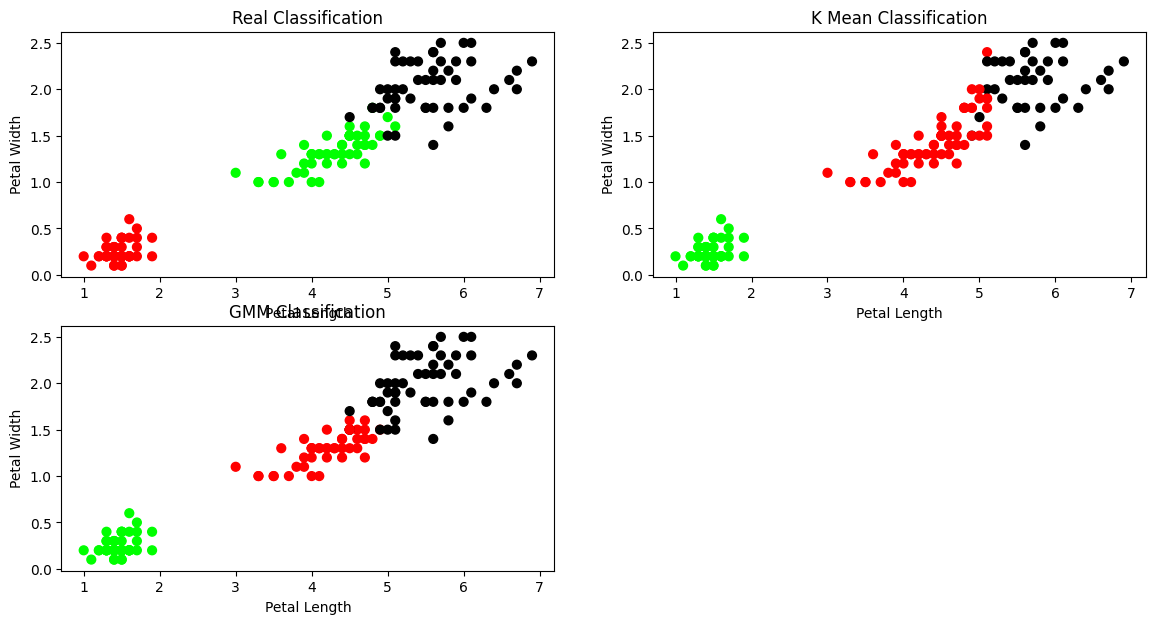

In [ ]:
#4/07/23
# 9. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using K-Means algorithm.
#Compare the results of these two algorithms and comment on the quality of clustering.
# You can add Java / Python ML library classes/API in the program.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3,n_init=10)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


(244, 2)


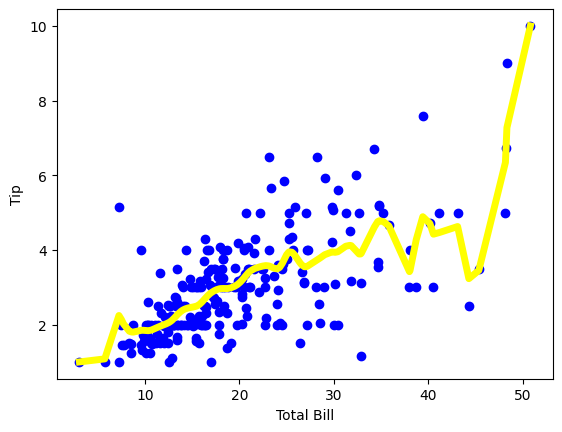

In [ ]:
# 10.  Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points.
# Select appropriate data set your experiment and draw graphs.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred


data=pd.read_csv('/content/drive/My Drive/tips.csv')
colA=np.array(data.total_bill)
colB=np.array(data.tip)
mcolA=np.mat(colA)
mcolB=np.mat(colB)
m=np.shape(mcolB)[1]
one=np.ones((1,m),dtype=int)
X=np.hstack((one.T,mcolA.T))
print(X.shape)
ypred=localWeightRegression(X,mcolB,0.8)
xsort=X.copy()
xsort.sort(axis=0)
plt.scatter(colA,colB,color='blue')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()